# Fashion_Mnist dataset using Tensorflow (Coursera lab)

In [1]:
# import labraries 
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load fashion MNIST dataset using keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()

print('Train shape',x_train.shape) # 60k images
print('Test shape',x_test.shape) #10k images



Train shape (60000, 28, 28)
Test shape (10000, 28, 28)


In [3]:
# labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

    0 -> T-shirt/top
    1 -> Trouser
    2 -> Pullover
    3 -> Dress
    4 -> Coat
    5 -> Sandal
    6 -> Shirt
    7 -> Sneaker
    8 -> Bag
    9 -> Ankle boot

label 0
We have  784 pixels
Pixels:
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 15

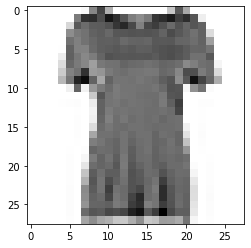

In [17]:
# Visualize the image 
np.set_printoptions(linewidth =320)
index = 10
print('label',y_train[index])
print('We have ' , x_train[index].size, 'pixels')
print('Pixels:')
print( x_train[index])
plt.imshow(x_train[index] , cmap = 'Greys')

In [24]:
# Normalize data 
x_train = x_train / x_train.max()
x_test = x_test /x_train.max()

In [42]:
#  create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128  , activation=tf.nn.relu),
    tf.keras.layers.Dense(units = 10 , activation=tf.nn.softmax)
])


In [43]:
# compile model
model.compile(tf.optimizers.Adam(),loss ='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [44]:
# fit model
history = model.fit(x_train , y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5018 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3798 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3370 - accuracy: 0.8767: 15s - loss: 0.3479 - accur - ETA: 15s - loss: 0.3492 - accuracy - ETA: 14s - loss: 0 - ETA: 6s - - ETA:  - - ETA:  - E - ETA: 
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3127 - accuracy: 0.8852: 39s - loss: 0.3162 - accuracy: 0.8 - ETA: 40s - loss: 0.3138 - a - ETA: 38s - loss: 0.3162 - accuracy: 0.8 - ETA: 37s - loss: 0.3178 - accuracy - ETA: 35s - loss: 0.3167 - accuracy: 0.885 - ETA: 35s - ETA: 29s - loss: 0.3180 - accuracy: - ETA: 28s - loss: 0.31 - ETA: 21s - loss: 0.31 - ETA
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2960 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 25s 

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

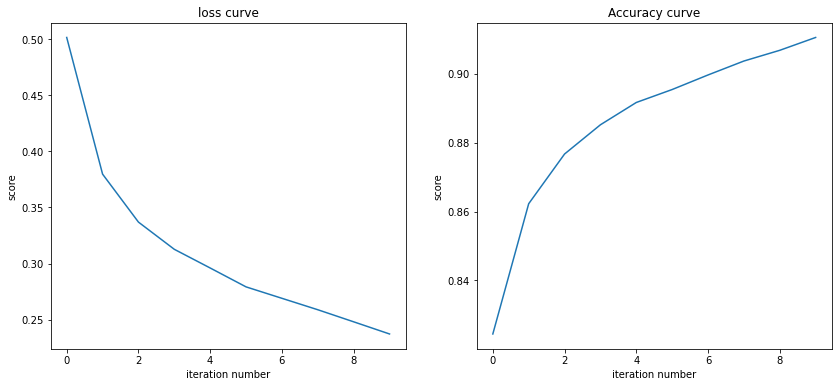

In [54]:
# show results
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('loss curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.title('Accuracy curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.show()



dict_keys(['loss', 'accuracy'])

In [36]:
# evaluate the model on  the testset 
model.evaluate (x_test , y_test)

313/313 [==============================] - 4s 9ms/step - loss: 69.4961 - accuracy: 0.8499


[69.49614715576172, 0.8499000072479248]

                                                    THE END 